Engy-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **07Sep21**

# Homework 01 (07Sep21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (95 pts)](#a1) Function approximation with Fourier basis functions.
 - [1.1)](#a11)(5 pts) Generate function.
 - [1.2)](#a12)(70 pts) Compute the number of Fourier modes for a given error level.
 - [1.3)](#a13)(10 pts) Plot the residual function and analyze it.
 - [1.4)](#a14)(10 pts) Increase the number of collocation points and recompute error and residual.
* [Assignment 2 (5 pts)](#a2) .
---

## <span style="color:blue">[Assignment 1 (95 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(5 pts) Generate the following step function on these shape points</span>
<br>
<span style="color:blue">
  $\{(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)\}$.
</span><a id="a11"></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy.linalg import solve
import math
from scipy.integrate import quad
from numpy.linalg import matrix_rank
plt.style.use('dark_background')

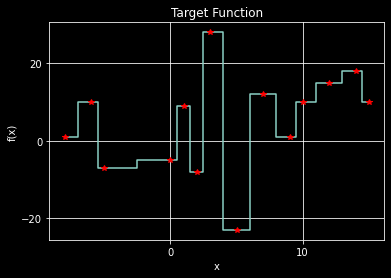

In [3]:
'''Generate the target function f'''

x=[]; y=[]

Shap_point=[(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)]
Shape= np.array(Shap_point)
#print(Shape[:,0])
x_min=Shape[:,0][0]
x_max=Shape[:,0][-1]
x.append(Shape[:,0]);y.append(Shape[:,1])
plt.step(Shape[:,0], Shape[:,1], where='mid',label='mid')
plt.plot(Shape[:,0], Shape[:,1], '*', color='red')
plt.grid(True)
plt.title('Target Function')
plt.xlabel('x');plt.ylabel('f(x)')
plt.rcParams["figure.figsize"] = (15,6)
plt.rcParams.update({'font.size': 22})
plt.show()

### <span style="color:blue">[1.2)](#toa)(70 pts) Compute "the best" approximant function $g$ using Fourier basis functions with sufficient number of modes to approximate $f$ with a relative $L_2$ norm below 30% error; use 100 equally spaced collocation abscissa points in $x$. Report the number of modes, show a function comparison plot, compute the $L_2$ norm relative error, and explain mathematically in what sense is your approximant the best.
</span><a id="a12"></a>

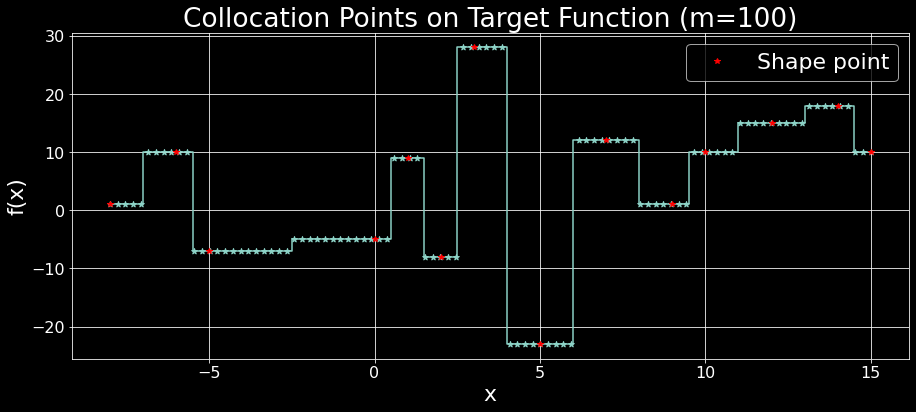

In [4]:
'''Collocation abscissa points'''
m=100
new_x = np.linspace(x_min,x_max,m)
i_p = interp1d(Shape[:,0], Shape[:,1], kind='nearest')
new_f= i_p(new_x)
plt.scatter(new_x,new_f, marker = '*')
plt.step(Shape[:,0], Shape[:,1], where='mid')
plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label= 'Shape point')
plt.legend()
plt.title('Collocation Points on Target Function (m='+str(m)+')')
plt.xlabel('x');plt.ylabel('f(x)')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()

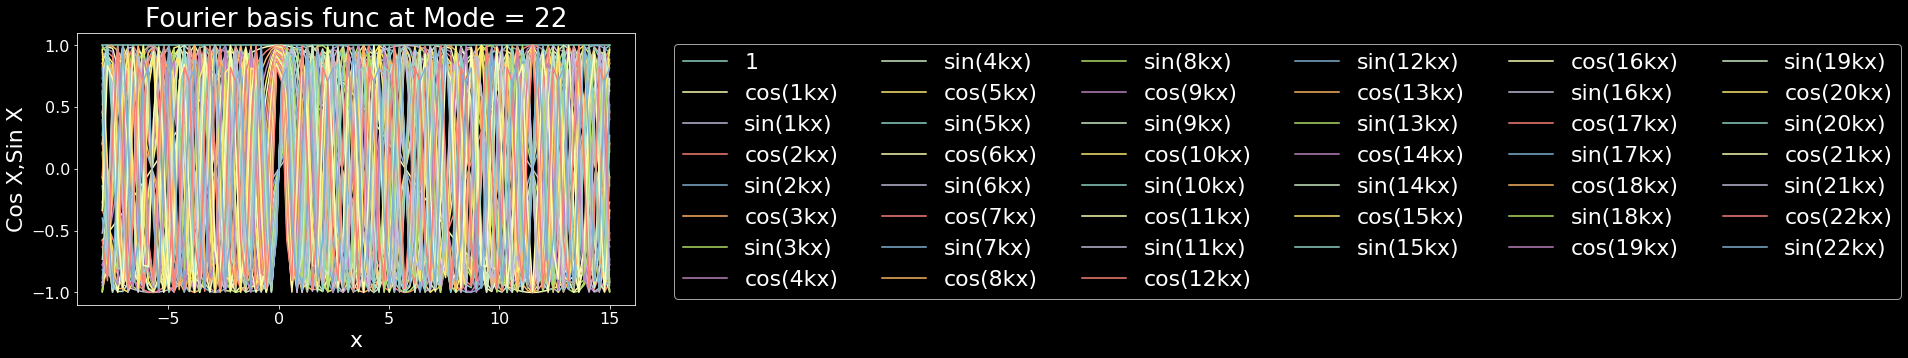

[[ 1.         -0.57668032 -0.81696989 ... -0.94226092 -0.57668032
   0.81696989]
 [ 1.         -0.52370385 -0.85190039 ... -0.54758631 -0.90469777
  -0.42605392]
 [ 1.         -0.4686186  -0.88340059 ...  0.68406419  0.26248208
  -0.96493687]
 ...
 [ 1.         -0.67546304 -0.73739384 ...  0.99096563  0.8213224
  -0.57046429]
 [ 1.         -0.62733471 -0.77874974 ...  0.10329345  0.7044188
   0.70978459]
 [ 1.         -0.57668032 -0.81696989 ... -0.94226092 -0.57668032
   0.81696989]]


In [6]:
'''Build the basis function evaluation matrix and target function vector at the collocation points'''
wavelength = new_x[-1] - new_x[0]
K=2*(math.pi)/wavelength
N=22
def FourierBasis(x_pts):
    Z_M=np.zeros((len(x_pts),2*N+1))
    for i in range (len(x_pts)):
        for j in range((2*N+1)):
            if (j==0):
                Z_M[i,j]=1
            elif (j%2)==1:
                Z_M[i,j]=np.cos(((j//2)+1)*K*x_pts[i])
            elif (j%2)==0:
                Z_M[i,j]=np.sin((j//2)*K*x_pts[i])
    return np.array(Z_M)

def Plot(Z_M,x_pts):
    for i in range(len(Z_M[0])):
        if i==0:
            plt.plot(x_pts,Z_M[:,0],label='1')
        elif i%2==1:
            plt.plot(x_pts,Z_M[:,i], label='cos(%ikx)'%(((i/2)+0.5)))
        elif i%2==0 and i!=0:
            plt.plot(x_pts,Z_M[:,i], label='sin(%ikx)'%(i/2))
        for j in range(len(Z_M[0])//2):
            plt.legend( ncol=6, bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.rcParams["figure.figsize"] = (10,5)
        plt.xlabel('x'); plt.ylabel('Cos X,Sin X')
        plt.title('Fourier basis func at Mode = %i'%N)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
    return(plt.show())


a_tilde_mtrx=FourierBasis(new_x)
Plot(a_tilde_mtrx,new_x)
print(a_tilde_mtrx)

In [5]:
'''Compute optimal coefficient vector'''
if a_tilde_mtrx.shape[0] > a_tilde_mtrx.shape[1]:
    print('A is overdetermined.')
elif a_tilde_mtrx.shape[0] < a_tilde_mtrx.shape[1]:
    print('A is underdetermined.')  
else:
    print('A is determined.')
    
if matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')
    
############################################################
f_tilde_vec = np.array(new_f)

#print(f_tilde_vec)
if matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
    print('A is full rank; solve for least squares.')
    c_tilde_star_vec = solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec)
else:
    print('A is rank deficient; solve for shortest least squares')
    c_tilde_star_vec = universal_solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec,
                                       pivot_tol=1e-6)
    
print('')
print('c_tilde_star_vec:\n')
for j,c in enumerate(c_tilde_star_vec):
    if j == 0:
        print('a_%2i = %10.3e'%(j,c))
    elif j%2 == 0:
        k = j/2
        print('b_%2i = %10.3e'%(k,c))
    else:
        k = (j+1)/2
        print('a_%2i = %10.3e'%(k,c))
        
print('')        
print('||r^*||_2 = %10.3e'%(np.linalg.norm(a_tilde_mtrx@c_tilde_star_vec-f_tilde_vec)))

A is overdetermined.
A is full rank.
A is full rank; solve for least squares.

c_tilde_star_vec:

a_ 0 =  2.995e+00
a_ 1 = -7.575e+00
b_ 1 = -6.312e-01
a_ 2 =  4.607e+00
b_ 2 =  4.775e+00
a_ 3 =  7.673e-01
b_ 3 =  2.747e+00
a_ 4 = -3.073e+00
b_ 4 =  2.792e+00
a_ 5 = -4.417e+00
b_ 5 = -4.838e+00
a_ 6 =  2.143e+00
b_ 6 = -4.502e+00
a_ 7 =  6.361e+00
b_ 7 =  3.717e+00
a_ 8 =  1.203e+00
b_ 8 =  3.211e+00
a_ 9 = -3.208e+00
b_ 9 =  2.343e+00
a_10 = -2.200e+00
b_10 =  2.489e+00
a_11 = -1.851e+00
b_11 = -3.811e-01
a_12 = -1.518e+00
b_12 = -1.674e+00
a_13 = -6.399e-01
b_13 = -1.810e+00
a_14 =  1.061e+00
b_14 = -3.288e-01
a_15 = -4.939e-02
b_15 =  9.671e-01
a_16 = -1.003e+00
b_16 = -2.686e-01
a_17 = -6.384e-01
b_17 = -1.581e+00
a_18 =  1.127e+00
b_18 = -7.673e-01
a_19 =  6.805e-01
b_19 =  1.526e+00
a_20 = -7.413e-01
b_20 =  2.983e-01
a_21 = -3.826e-01
b_21 = -7.579e-01
a_22 = -8.089e-01
b_22 = -5.050e-01

||r^*||_2 =  3.578e+01


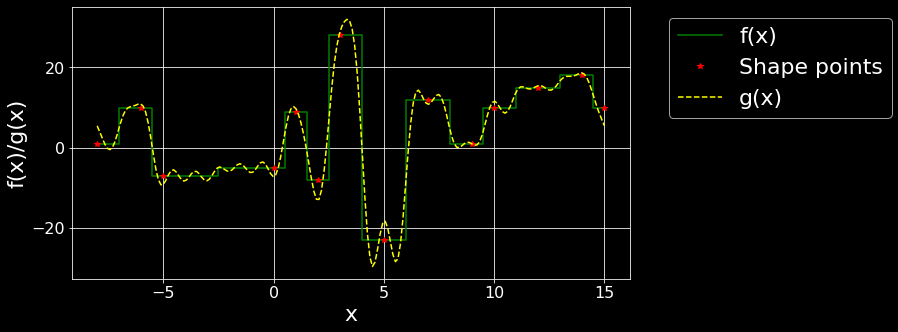

In [6]:
'''Build the best approximant function'''
def g_best_vec_func(x_pts):
    a_mtrx = FourierBasis(x_pts)
    #print(a_mtrx[0])
    return a_mtrx@c_tilde_star_vec
n_pts = max(2*m, 200)
x_pts = np.linspace(x_min, x_max, n_pts)
g_best_vec_1 = g_best_vec_func(x_pts)

####################################################################################
'''Plot comparison of f and g_best_vec'''
#plt.scatter(new_x,new_f, marker = '*')
plt.step(Shape[:,0], Shape[:,1], where='mid',label='f(x)', color='green')
plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label='Shape points')
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_pts,g_best_vec_1,'--',label='g(x)', color='yellow')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('x');plt.ylabel("f(x)/g(x)")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [7]:
'''L2 norm error'''
def f_integrand(x):
    return i_p(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = g_best_vec_func(np.array([x]))
    return g_vec**2

print('')

g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = i_p(np.array([x]))
    g_vec = g_best_vec_func(np.array([x]))
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')

||f||_L2 = 64.633583
quadrature error =3.142109e-03

||g||_L2 = 61.71535128217095
quadrature error = 7.280941187293166e-06

||f-g||_L2 = 18.965684306088043
quadrature error = 5.182083668842097e-06

Relative error =  29.343390 %


<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[1.3)](#toa)(10 pts) Plot the residual function and analyze it.
</span><a id="a13"></a>

Positives at collocation pts =  54
Negatives at collocation pts =  46
Positives =  267
Negatives =  233


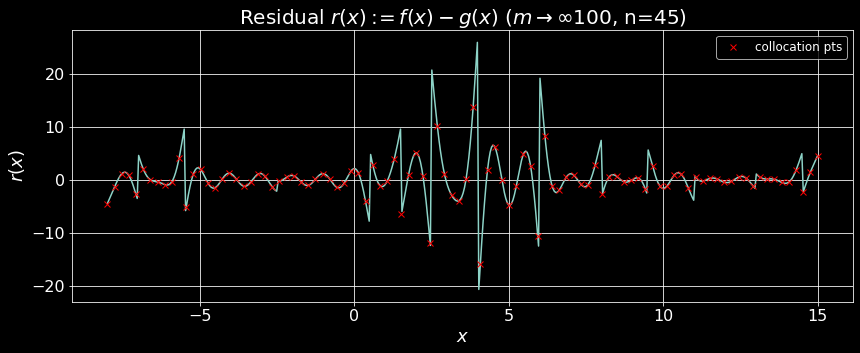

In [8]:
'''Residual of the best approximant'''

plt.style.use('dark_background')

n_pts = max(3*m, 500)
x_pts = np.linspace(x_min, x_max, n_pts)

residual = i_p(x_pts) - g_best_vec_func(x_pts)
residual_collocation_pts = i_p(new_x) - g_best_vec_func(new_x)
print('Positives at collocation pts = ', tuple([True for p in residual_collocation_pts if p>0]).count(True))
print('Negatives at collocation pts = ', tuple([True for p in residual_collocation_pts if p<0]).count(True))
print('Positives = ', tuple([True for p in residual if p>0]).count(True))
print('Negatives = ', tuple([True for p in residual if p<0]).count(True))
  
plt.figure(1, figsize=(14, 5))
plt.plot(x_pts, residual)
plt.plot(new_x, i_p(new_x)-g_best_vec_func(new_x),'bx',label='collocation pts',color='red')
plt.title(r'Residual $r(x) :\!\!= f(x) - g(x)$ ($m\rightarrow\infty$'+str(m)+', n='+str(len(a_tilde_mtrx[0]))+')', fontsize=20)

plt.ylabel(r'$r(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

<span style="color:blue">**Analysis:**</span> The residue tells us that it is a good guess, because the positiv and negative values are very close( evenly distributed). It indicates the residual is symmetric relative to the abscissa axis. This symmetric neature we can also observed from the residue plot which shows almost equal shoots with respect to '0' on both side.(i.e. symmetric distribution) 

### <span style="color:blue">[1.4)](#toa)(10 pts) Compute "the best" approximant function $g$ using Fourier basis functions with the same number of modes; use 200 equally spaced collocation abscissa points in $x$. Does the error decrease? If so, should this always be the case?
</span><a id="a14"></a>

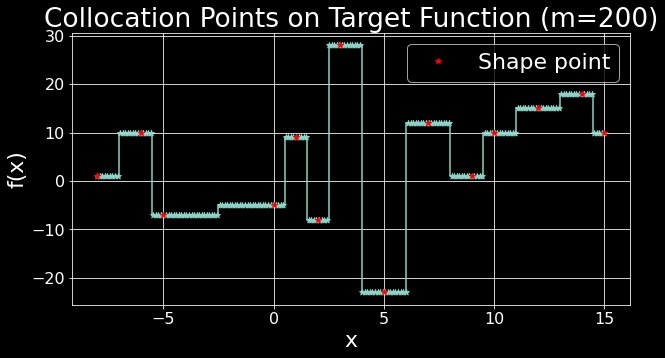

In [9]:
'''Collocation abscissa points'''
m=200
new_x = np.linspace(x_min,x_max,m)
i_p = interp1d(Shape[:,0], Shape[:,1], kind='nearest')
new_f= i_p(new_x)
plt.scatter(new_x,new_f, marker = '*')
plt.step(Shape[:,0], Shape[:,1], where='mid')
plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label= 'Shape point')
plt.legend()
plt.title('Collocation Points on Target Function (m='+str(m)+')')
plt.xlabel('x');plt.ylabel('f(x)')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()

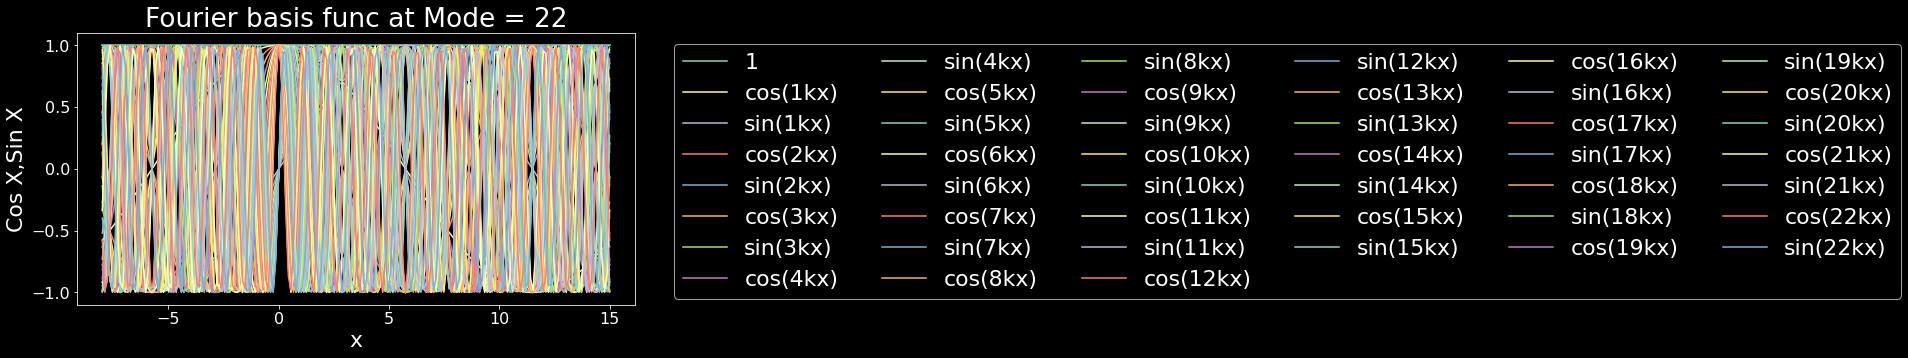

In [10]:
'''Build the basis function evaluation matrix and target function vector at the collocation points'''
a_tilde_mtrx=FourierBasis(new_x)
Plot(a_tilde_mtrx,new_x)

In [11]:
'''Compute optimal coefficient vector'''

if a_tilde_mtrx.shape[0] > a_tilde_mtrx.shape[1]:
    print('A is overdetermined.')
elif a_tilde_mtrx.shape[0] < a_tilde_mtrx.shape[1]:
    print('A is underdetermined.')  
else:
    print('A is determined.')
    
if matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')
    
############################################################
f_tilde_vec = np.array(new_f)

#print(f_tilde_vec)
if matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
    print('A is full rank; solve for least squares.')
    c_tilde_star_vec = solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec)
else:
    print('A is rank deficient; solve for shortest least squares')
    c_tilde_star_vec = universal_solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec,
                                       pivot_tol=1e-6)
    
print('')
print('c_tilde_star_vec:\n')
for j,c in enumerate(c_tilde_star_vec):
    if j == 0:
        print('a_%2i = %10.3e'%(j,c))
    elif j%2 == 0:
        k = j/2
        print('b_%2i = %10.3e'%(k,c))
    else:
        k = (j+1)/2
        print('a_%2i = %10.3e'%(k,c))
        
print('')        
print('||r^*||_2 = %10.3e'%(np.linalg.norm(a_tilde_mtrx@c_tilde_star_vec-f_tilde_vec)))

A is overdetermined.
A is full rank.
A is full rank; solve for least squares.

c_tilde_star_vec:

a_ 0 =  3.389e+00
a_ 1 = -7.255e+00
b_ 1 = -3.733e-01
a_ 2 =  4.601e+00
b_ 2 =  5.211e+00
a_ 3 =  8.483e-01
b_ 3 =  3.266e+00
a_ 4 = -3.441e+00
b_ 4 =  3.160e+00
a_ 5 = -4.803e+00
b_ 5 = -4.863e+00
a_ 6 =  1.728e+00
b_ 6 = -4.632e+00
a_ 7 =  6.129e+00
b_ 7 =  3.400e+00
a_ 8 =  1.319e+00
b_ 8 =  2.897e+00
a_ 9 = -2.944e+00
b_ 9 =  2.174e+00
a_10 = -2.136e+00
b_10 =  2.541e+00
a_11 = -1.766e+00
b_11 = -3.837e-01
a_12 = -1.536e+00
b_12 = -1.334e+00
a_13 = -8.744e-01
b_13 = -1.766e+00
a_14 =  9.028e-01
b_14 = -7.850e-01
a_15 = -1.775e-01
b_15 =  7.554e-01
a_16 = -7.161e-01
b_16 = -4.402e-01
a_17 = -1.508e-01
b_17 = -1.921e+00
a_18 =  1.431e+00
b_18 = -6.127e-01
a_19 =  9.516e-01
b_19 =  1.776e+00
a_20 = -4.434e-01
b_20 =  8.239e-01
a_21 = -5.983e-01
b_21 = -1.847e-01
a_22 = -1.203e+00
b_22 = -2.956e-01

||r^*||_2 =  5.206e+01


In [12]:
'''Build the best approximant function'''
n_pts = max(2*m, 200)
x_pts = np.linspace(x_min, x_max, n_pts)
g_best_vec_1 = g_best_vec_func(x_pts)

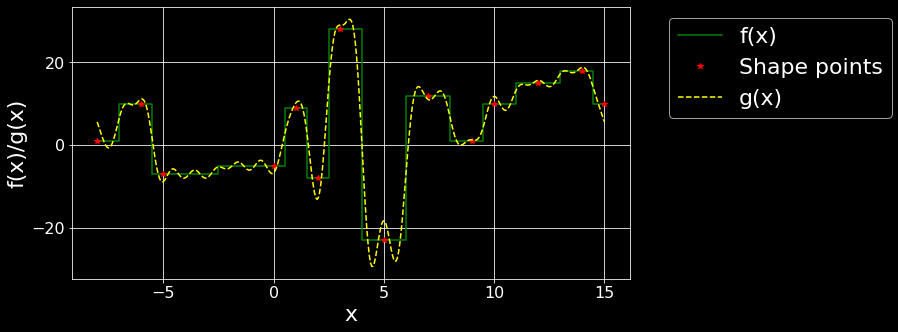

In [13]:
'''Plot comparison of f and g_best_vec'''
#plt.scatter(new_x,new_f, marker = '*')
plt.step(Shape[:,0], Shape[:,1], where='mid',label='f(x)', color='green')
plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label='Shape points')
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_pts,g_best_vec_1,'--',label='g(x)', color='yellow')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('x');plt.ylabel("f(x)/g(x)")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [14]:
'''L2 norm error'''

print('')

g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error)


print('')

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')


||g||_L2 = 62.45049535987834
quadrature error = 8.200272670233488e-06

||f-g||_L2 = 18.35781742819832
quadrature error = 4.121440781545971e-06

Relative error =  28.402909 %


Positives at collocation pts =  103
Negatives at collocation pts =  97
Positives =  310
Negatives =  290


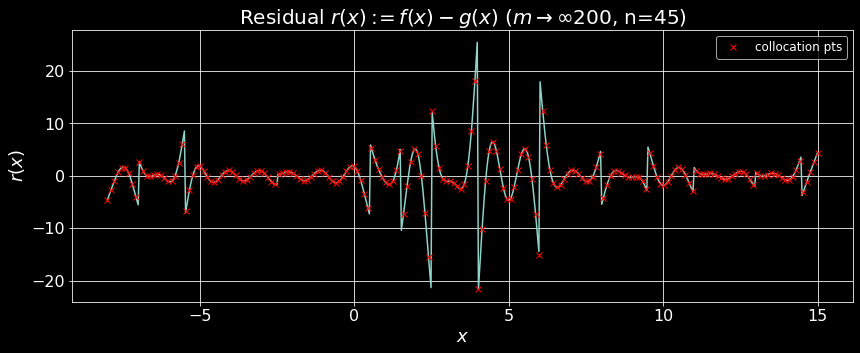

In [15]:
'''Residual of the best approximant'''


n_pts = max(3*m, 500)
x_pts = np.linspace(x_min, x_max, n_pts)

residual = i_p(x_pts) - g_best_vec_func(x_pts)
residual_collocation_pts = i_p(new_x) - g_best_vec_func(new_x)
print('Positives at collocation pts = ', tuple([True for p in residual_collocation_pts if p>0]).count(True))
print('Negatives at collocation pts = ', tuple([True for p in residual_collocation_pts if p<0]).count(True))
print('Positives = ', tuple([True for p in residual if p>0]).count(True))
print('Negatives = ', tuple([True for p in residual if p<0]).count(True))
  
plt.figure(1, figsize=(14, 5))
plt.plot(x_pts, residual)
plt.plot(new_x, i_p(new_x)-g_best_vec_func(new_x),'bx',label='collocation pts',color='red')
plt.title(r'Residual $r(x) :\!\!= f(x) - g(x)$ ($m\rightarrow\infty$'+str(m)+', n='+str(len(a_tilde_mtrx[0]))+')', fontsize=20)

plt.ylabel(r'$r(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

<span style="color:blue">**Explanation:**</span> As we increase the number of collocation points the distribution become more and more continious. With increasing # of collocation the discrit sum (used to compute $L_2$ norm) become an integral. This improves the values of $L_2$ thus reduses the error.

Use of More collocation points makes the approximation continious and thuse decrease the overall error.

## <span style="color:blue">[Assignment 2 (5 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

<span style="color:blue">**Answer:**</span>Hardest part was to understand the mathematical description. I understand it after going through the code.